<a href="https://colab.research.google.com/github/PaapuKavya/WeatherApplication/blob/main/User_Engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
sns.set(style="whitegrid")

In [11]:
course_data = pd.read_csv("/content/drive/MyDrive/data/PW0624_G1549_online_course_engagement_data.csv")

In [12]:
course_data.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [13]:
course_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [14]:
course_data.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

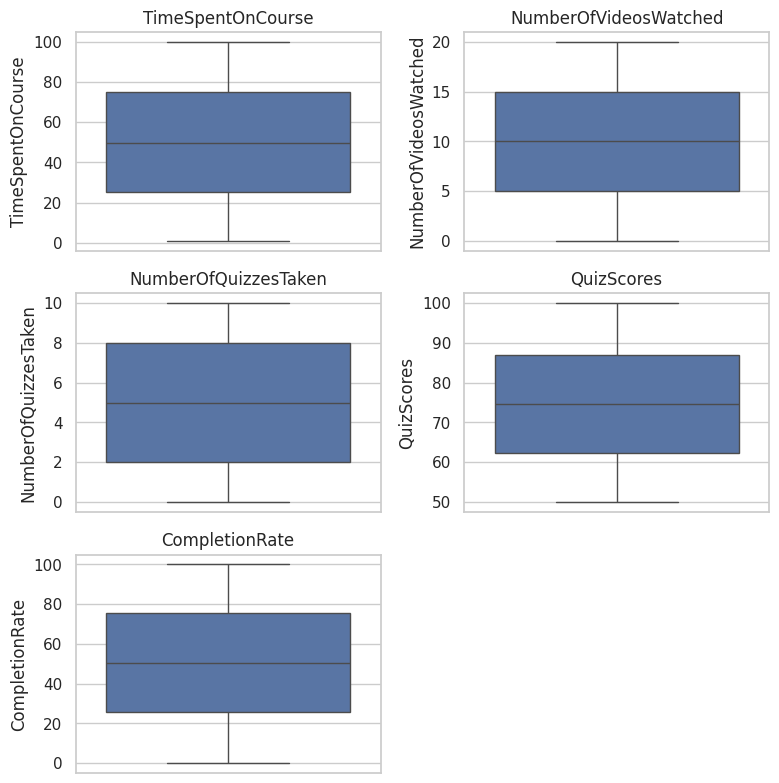

In [15]:
numeric_columns = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate']

plt.figure(figsize=(8, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=course_data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [16]:
course_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,9000.0,4498.894556,2596.849433,1.000000,2251.750000,4483.500000,6751.250000,9000.000000
TimeSpentOnCourse,9000.0,50.163822,28.491750,1.005230,25.440548,49.818417,75.069924,99.992558
NumberOfVideosWatched,9000.0,10.024667,6.029878,0.000000,5.000000,10.000000,15.000000,20.000000
NumberOfQuizzesTaken,9000.0,5.090556,3.157762,0.000000,2.000000,5.000000,8.000000,10.000000
QuizScores,9000.0,74.706028,14.378383,50.005119,62.283451,74.743294,87.022663,99.994984
CompletionRate,9000.0,50.340146,28.950977,0.009327,25.653614,50.264124,75.572493,99.979711
DeviceType,9000.0,0.500667,0.500027,0.000000,0.000000,1.000000,1.000000,1.000000
CourseCompletion,9000.0,0.396444,0.489186,0.000000,0.000000,0.000000,1.000000,1.000000


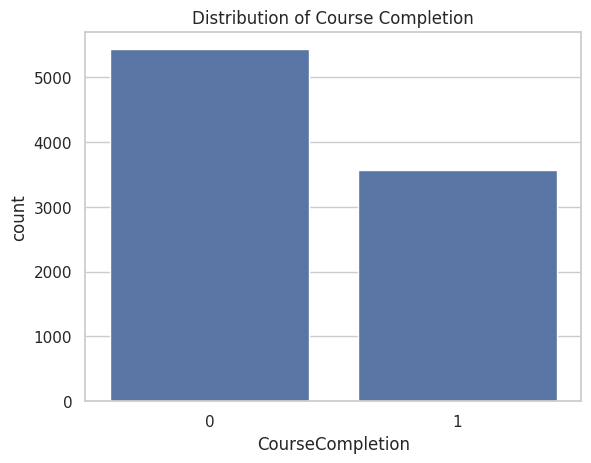

In [17]:
sns.countplot(x='CourseCompletion', data=course_data)
plt.title('Distribution of Course Completion')
plt.show()

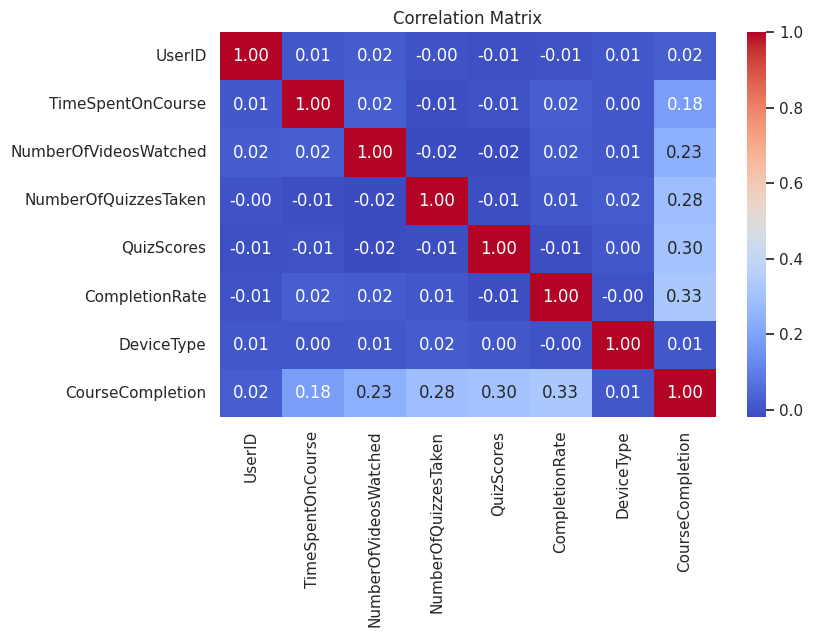

In [18]:
# Correlation matrix
course_data_corr = course_data.drop(["CourseCategory"], axis=1)
plt.figure(figsize=(8, 5))
sns.heatmap(course_data_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

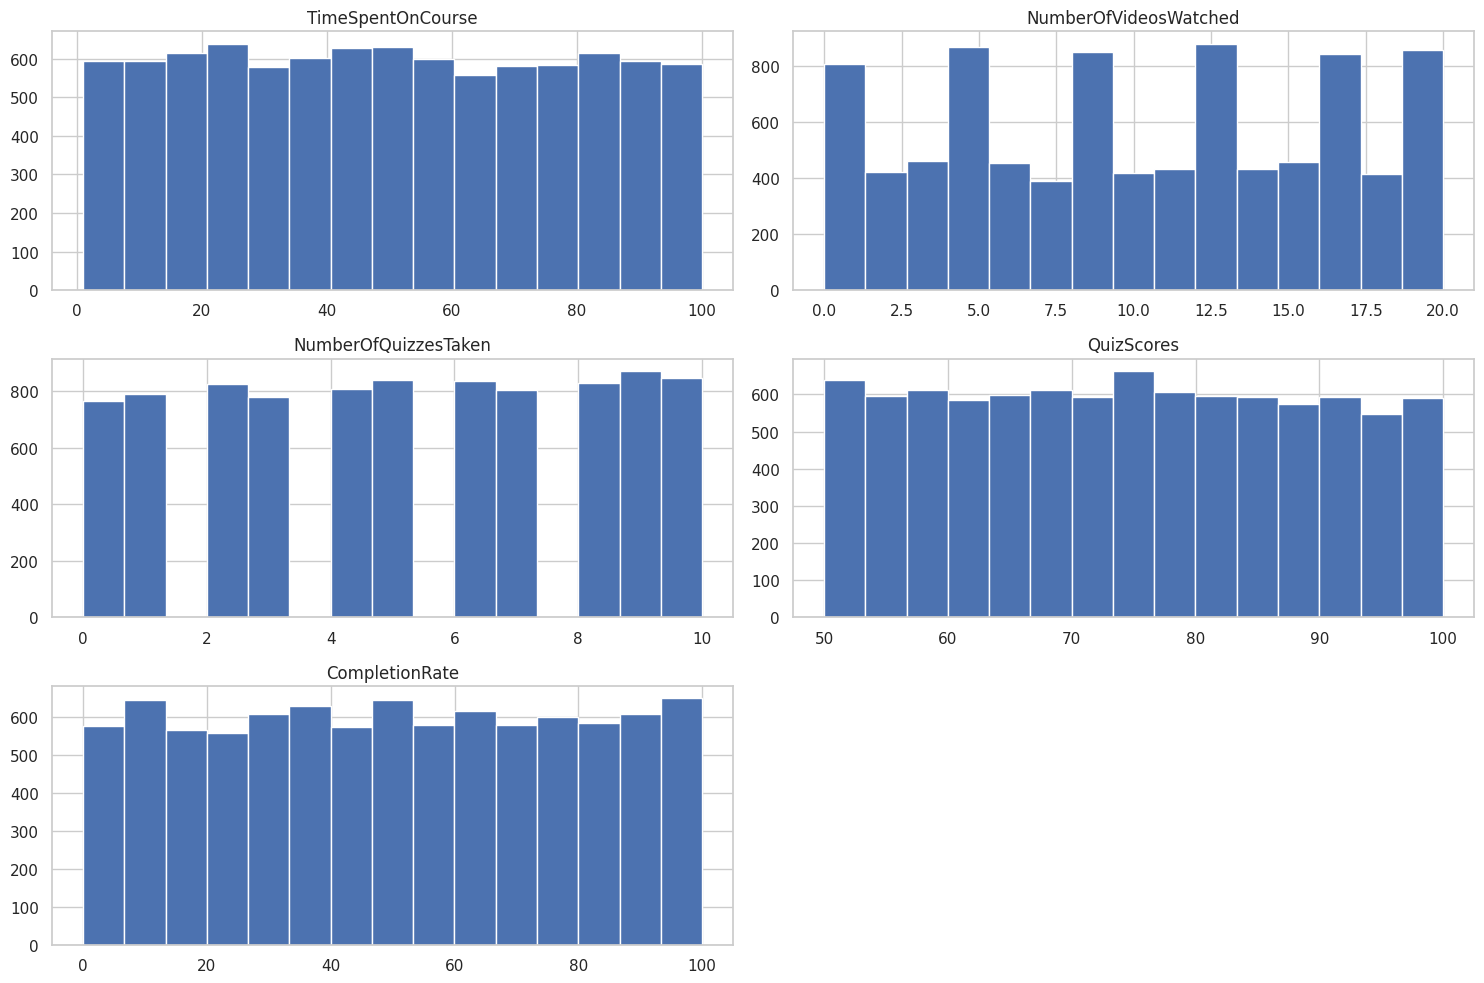

In [19]:
# Distribution of numeric features
course_data[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.tight_layout()
plt.show()

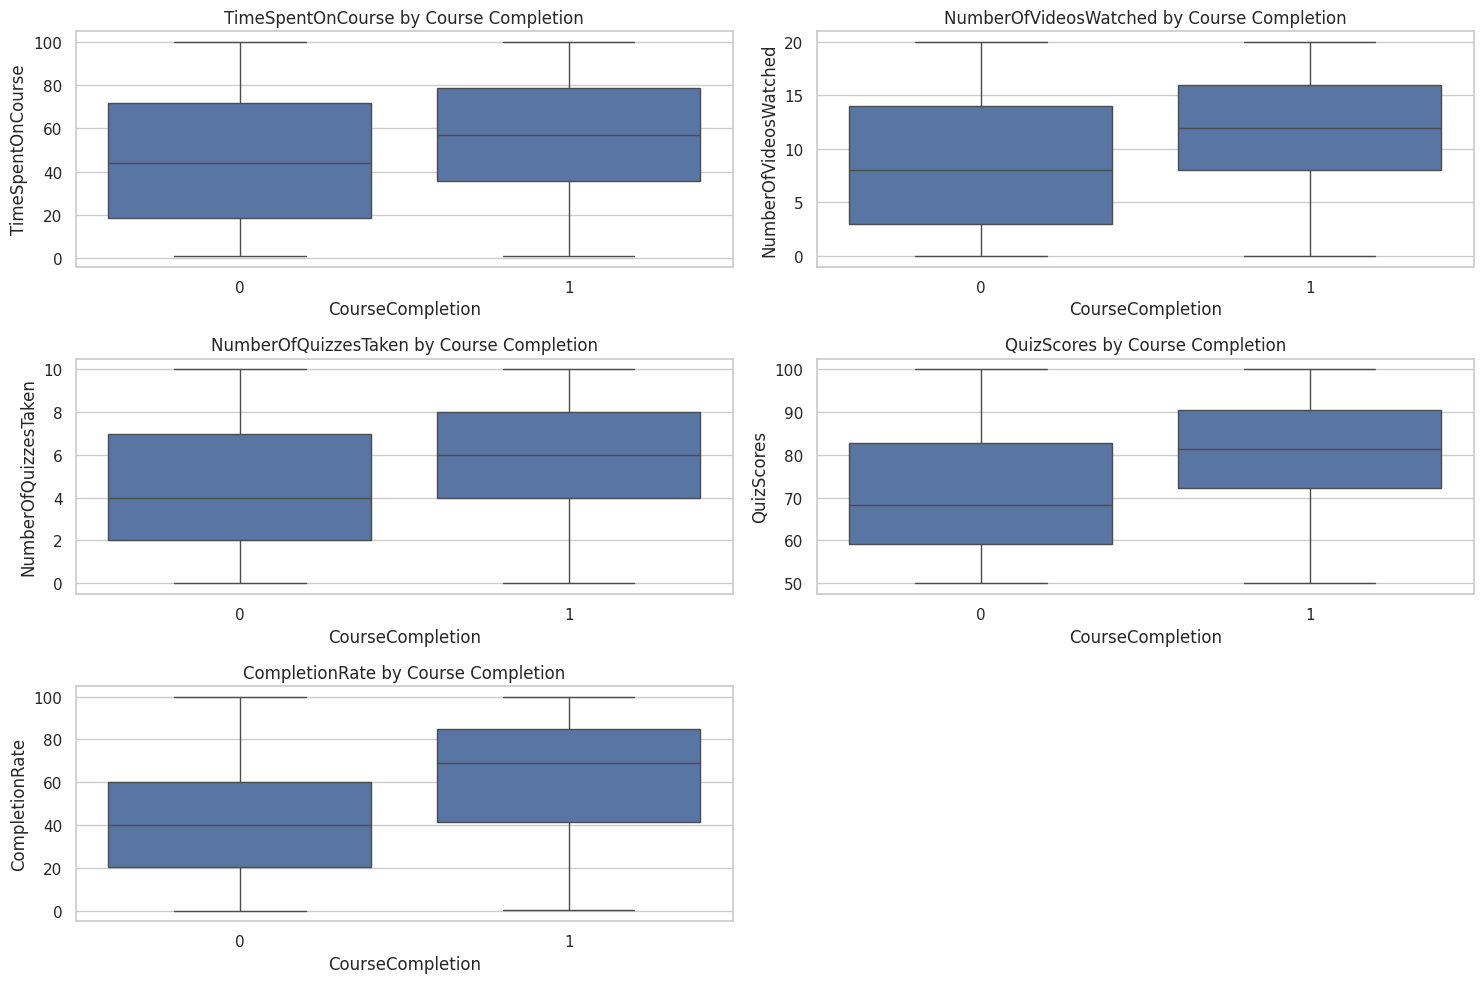

In [20]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='CourseCompletion', y=column, data=course_data)
    plt.title(f'{column} by Course Completion')
plt.tight_layout()
plt.show()

In [21]:
# Create a feature for the average time spent per video
course_data['AvgTimePerVideo'] = course_data['TimeSpentOnCourse'] / (course_data['NumberOfVideosWatched'] + 1)

# Create a feature for the average quiz score per quiz taken
course_data['AvgQuizScore'] = course_data['QuizScores'] / (course_data['NumberOfQuizzesTaken'] + 1)

# Create a feature for engagement intensity (combined metric)
course_data['EngagementIntensity'] = (course_data['TimeSpentOnCourse'] * course_data['NumberOfVideosWatched'] * course_data['NumberOfQuizzesTaken']) / (course_data['CompletionRate'] + 1)

# Create a binary feature for high/low completion rate
course_data['HighCompletionRate'] = np.where(course_data['CompletionRate'] > course_data['CompletionRate'].median(), 1, 0)

# Create a feature for the ratio of quizzes taken to videos watched
course_data['QuizToVideoRatio'] = course_data['NumberOfQuizzesTaken'] / (course_data['NumberOfVideosWatched'] + 1)

In [22]:
course_data.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,AvgTimePerVideo,AvgQuizScore,EngagementIntensity,HighCompletionRate,QuizToVideoRatio
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0,1.665540,12.591414,69.941063,0,0.166667
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0,13.901320,10.435995,2.086270,1,2.500000
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1,5.788032,26.152987,37.508074,1,0.133333
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1,1.946579,5.381714,61.768508,1,0.555556
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0,5.440626,98.428285,0.000000,0,0.000000


In [23]:
course_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,9000.0,4498.894556,2596.849433,1.000000,2251.750000,4483.500000,6751.250000,9000.000000
TimeSpentOnCourse,9000.0,50.163822,28.491750,1.005230,25.440548,49.818417,75.069924,99.992558
NumberOfVideosWatched,9000.0,10.024667,6.029878,0.000000,5.000000,10.000000,15.000000,20.000000
NumberOfQuizzesTaken,9000.0,5.090556,3.157762,0.000000,2.000000,5.000000,8.000000,10.000000
QuizScores,9000.0,74.706028,14.378383,50.005119,62.283451,74.743294,87.022663,99.994984
CompletionRate,9000.0,50.340146,28.950977,0.009327,25.653614,50.264124,75.572493,99.979711
DeviceType,9000.0,0.500667,0.500027,0.000000,0.000000,1.000000,1.000000,1.000000
CourseCompletion,9000.0,0.396444,0.489186,0.000000,0.000000,0.000000,1.000000,1.000000
AvgTimePerVideo,9000.0,8.493430,12.780535,0.050781,2.328376,4.578717,8.574505,99.480615
AvgQuizScore,9000.0,20.034060,19.613263,4.547829,8.475057,12.340286,22.259327,99.974806


In [24]:
# Drop less informative features
course_data.drop(['UserID'], axis=1, inplace=True)

# Convert categorical variables to numeric
course_data = pd.get_dummies(course_data, columns=['CourseCategory'], drop_first=True)

# Separate features and target variable
X = course_data.drop('CourseCompletion', axis=1)
y = course_data['CourseCompletion']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X = pd.DataFrame(X_scaled, columns=X.columns)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print(f"Decision Tree - Accuracy: {dt_accuracy}, Precision: {dt_precision}, Recall: {dt_recall}, F1 Score: {dt_f1}")

Decision Tree - Accuracy: 0.9161111111111111, Precision: 0.905160390516039, Recall: 0.8866120218579235, F1 Score: 0.8957902001380263


In [30]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1 Score: {rf_f1}")

Random Forest - Accuracy: 0.9561111111111111, Precision: 0.9670958512160229, Recall: 0.9234972677595629, F1 Score: 0.9447938504542278


In [32]:
nn_model = MLPClassifier(random_state=42, max_iter=300)
nn_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=42)

In [33]:
nn_predictions = nn_model.predict(X_test)

# Evaluate the model
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)

print(f"Neural Network - Accuracy: {nn_accuracy}, Precision: {nn_precision}, Recall: {nn_recall}, F1 Score: {nn_f1}")

Neural Network - Accuracy: 0.9027777777777778, Precision: 0.9018759018759018, Recall: 0.8538251366120219, F1 Score: 0.8771929824561404
